# Rossman`s Uncertainty-Aware Sales Prediction

# Local

If you are running the notebook you should put the  .csv in the `dataset` folder and run this cell
- ignore the next cell

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Load datasets
train = pd.read_csv('dataset/train.csv', parse_dates=['Date'], low_memory=False)
store = pd.read_csv('dataset/store.csv')

# Merge train with store information
df = pd.merge(train, store, on='Store', how='left')

# Basic Info
print(df.info())
print(df.head())


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\francois\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\francois\AppData\Local\Programs\Python\Python311\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\francois\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernel

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



ImportError: numpy.core.multiarray failed to import

# Kaggle
If you are using kaggle as your notebook environment:
1. add `/kaggle/competitions/rossmann-store-sales` to the input list
2. run this cell


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
base_path = "/kaggle/input/competitions/rossmann-store-sales/"

# Load datasets 
train = pd.read_csv(f'{base_path}train.csv', parse_dates=['Date'], low_memory=False)
store = pd.read_csv(f'{base_path}store.csv')
test = pd.read_csv(f'{base_path}test.csv')

df = pd.merge(train, store, on='Store', how='left')

print(df.info())
print(df.head(-1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

## 1. Individual Store Trend Analysis

To understand the underlying patterns in the Rossmann dataset, we visualized a sample of stores ($ 1, 10, 100, 1000 $). Retail sales data is "noisy" due to weekly cycles and holiday spikes.

Raw Sales (Gray): Displays the high volatility of daily transactions, including zero during Sunday.

7-Day Rolling Mean (Blue): We applied a transformation to smooth out the daily "zig-zags." This allows us to see the actual sales direction and seasonal strength without being distracted by day-of-week fluctuations.

As we can see from the plots:
- store `1000` has a higher average sales compared to others
- The sales data is missing from store 100 and 1000
- one can notice a spike increase before christmass `2014-01` and `2015-01`
- for all of the stores the sales pattern is like a sin function and with my stimate the period is every 2 to 3 weeks

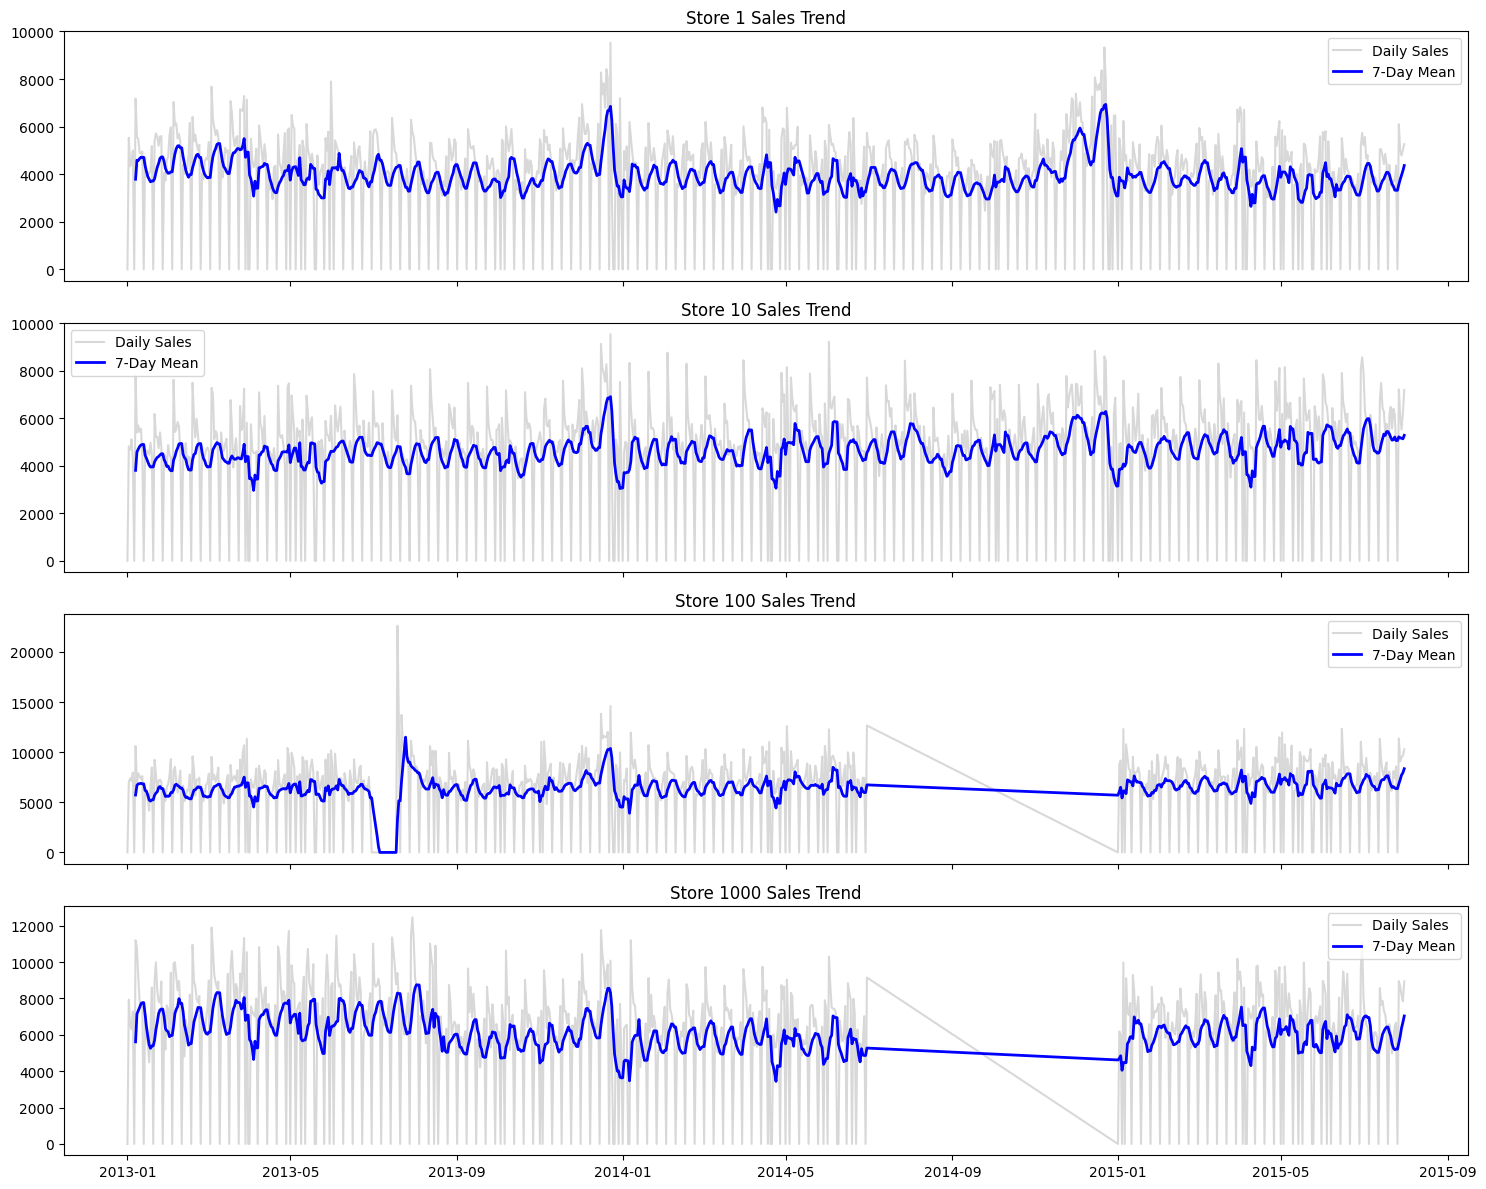

In [2]:
sample_stores = [1, 10, 100,1000]
fig, axes = plt.subplots(len(sample_stores), 1, figsize=(15, 12), sharex=True)

for i, store_id in enumerate(sample_stores):
    store_data = df[df['Store'] == store_id].sort_values('Date')
    
    axes[i].plot(store_data['Date'], store_data['Sales'], alpha=0.3, label='Daily Sales', color='gray')
    
    rolling_sales = store_data.set_index('Date')['Sales'].rolling(window=7).mean()
    axes[i].plot(rolling_sales.index, rolling_sales.values, label='7-Day Mean', color='blue', linewidth=2)
    
    axes[i].set_title(f'Store {store_id} Sales Trend')
    axes[i].legend()

plt.tight_layout()
plt.show()

## 2.Phase 6: Categorical Impact Analysis (External Drivers)**


The first plot compares sales on days with and without a temporary promotion.

- There is a significant upward shift in both the median sales and the interquartile range (IQR) when `Promo=1`.


The second plot examines sales during Public holidays (`a`), Easter (`b`), and Christmas (`c`)(for example), compared to normal days (`0`).

- Most stores show near-zero sales during state holidays. However, the outliers indicate that a small subset of stores remains open.


The final plot compares sales during periods when local schools are closed.

- While the median sales increase slightly during school holidays, the impact is less dramatic than a standard `Promo`.


### **Summary**

| Feature | Impact Strength | Primary Effect |
| --- | --- | --- |
| **Promo** | **High** | Increases median sales and overall volume significantly. |
| **State Holiday** | **Critical** | Usually results in zero sales, but marks "exception" days. |
| **School Holiday** | **Moderate** | Provides a subtle lift; likely dependent on store-specific context. |



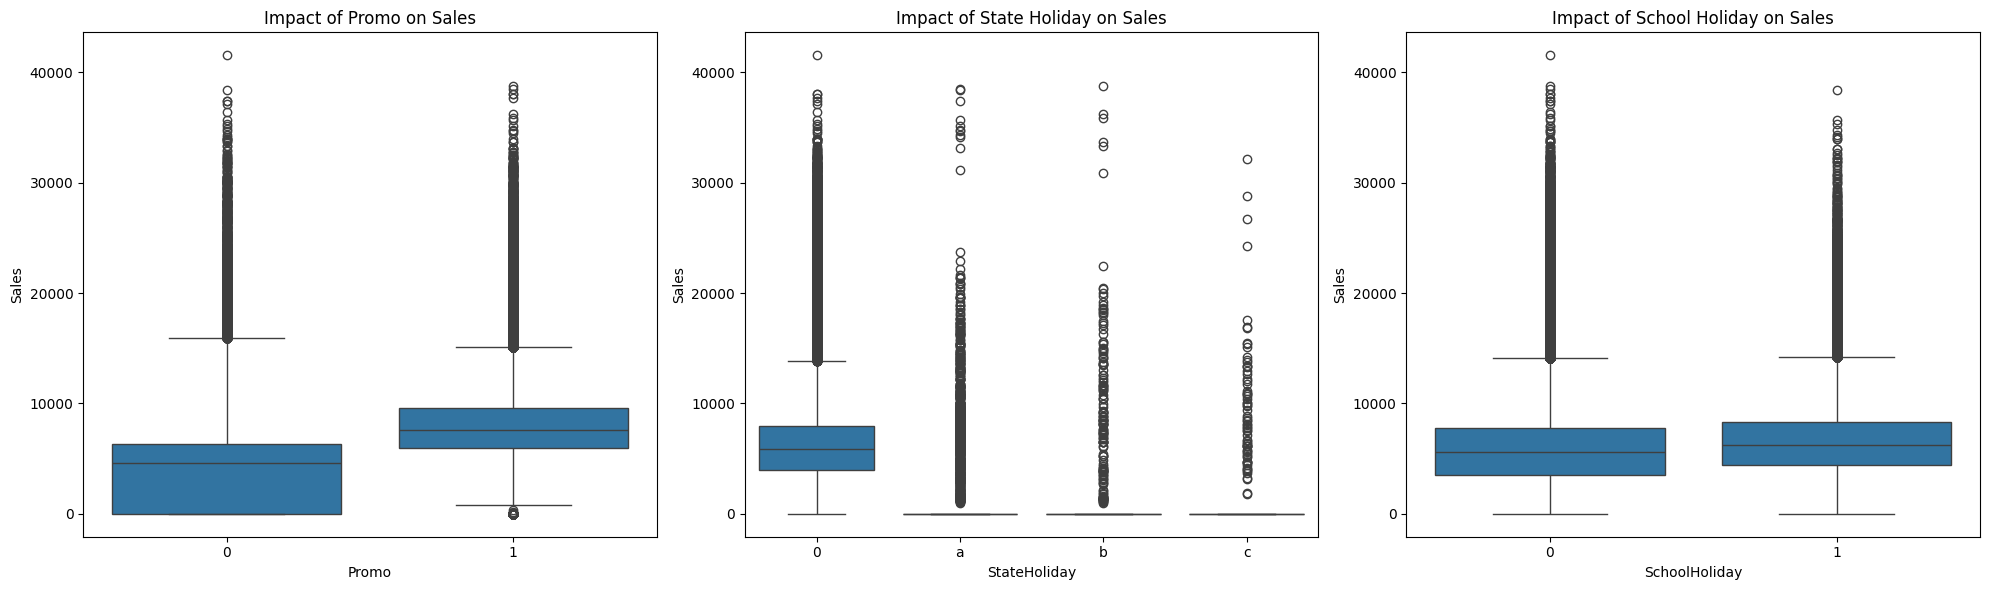

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.boxplot(data=df, x='Promo', y='Sales', ax=axes[0])
axes[0].set_title('Impact of Promo on Sales')

sns.boxplot(data=df, x='StateHoliday', y='Sales', ax=axes[1])
axes[1].set_title('Impact of State Holiday on Sales')

sns.boxplot(data=df, x='SchoolHoliday', y='Sales', ax=axes[2])
axes[2].set_title('Impact of School Holiday on Sales')

plt.tight_layout()
plt.show()

## 3. Sales Density by Store Type (StoreType)
We used a Violin Plot to visualize the distribution and density of sales across the four  store categories (a, b, c, and d). 

Store Type 'b' : Clearly stands out with a much higher median and a wider distribution at the top. These are likely "flagship" or high-traffic transit stores.

Store Types 'a', 'c', and 'd': These have a more normal distribution. Type 'd' shows a slightly higher and more "stretched" upper distribution.




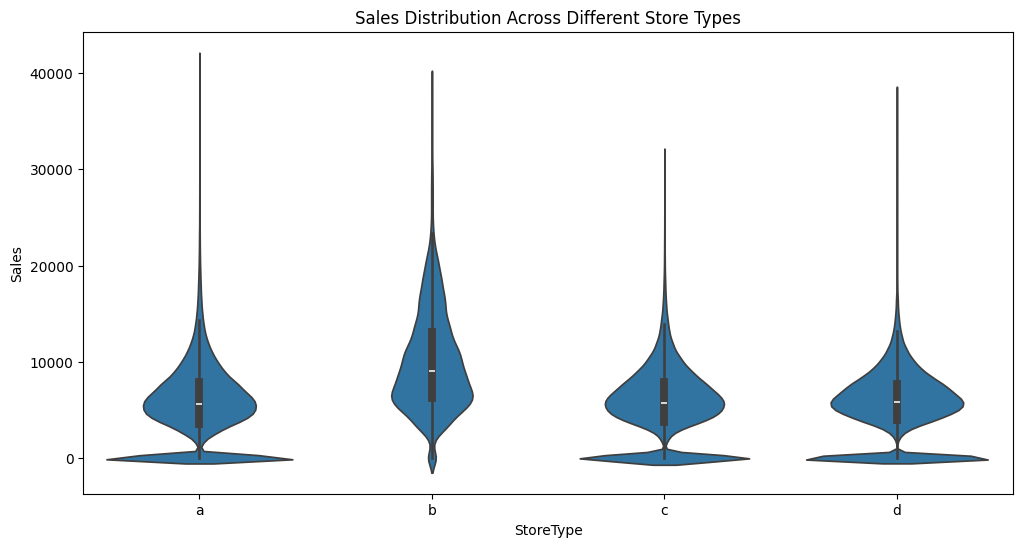

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='StoreType', y='Sales', order=['a', 'b', 'c', 'd'])
plt.title('Sales Distribution Across Different Store Types')
plt.show()

## 4. Correlation Heatmap

I filtered for numeric types.

Sales vs. Customers : As expected, these have the highest correlation. But we cannot use "Customers" as an input for future predictions since we won't know the customer count in test faze.

Sales vs. Promo: Shows a clear positive correlation.

DayOfWeek vs. Sales: This reflects the fact that as the Day of the Week index increases (towards 7 = Sunday), sales drop to zero.

CompetitionDistance: A weak correlation here suggests that the distance to a competitor matters less than whether a store is currently running a promotion or if it's a holiday.

Sales vs. open: Selfexplanatory, but less than i expected.

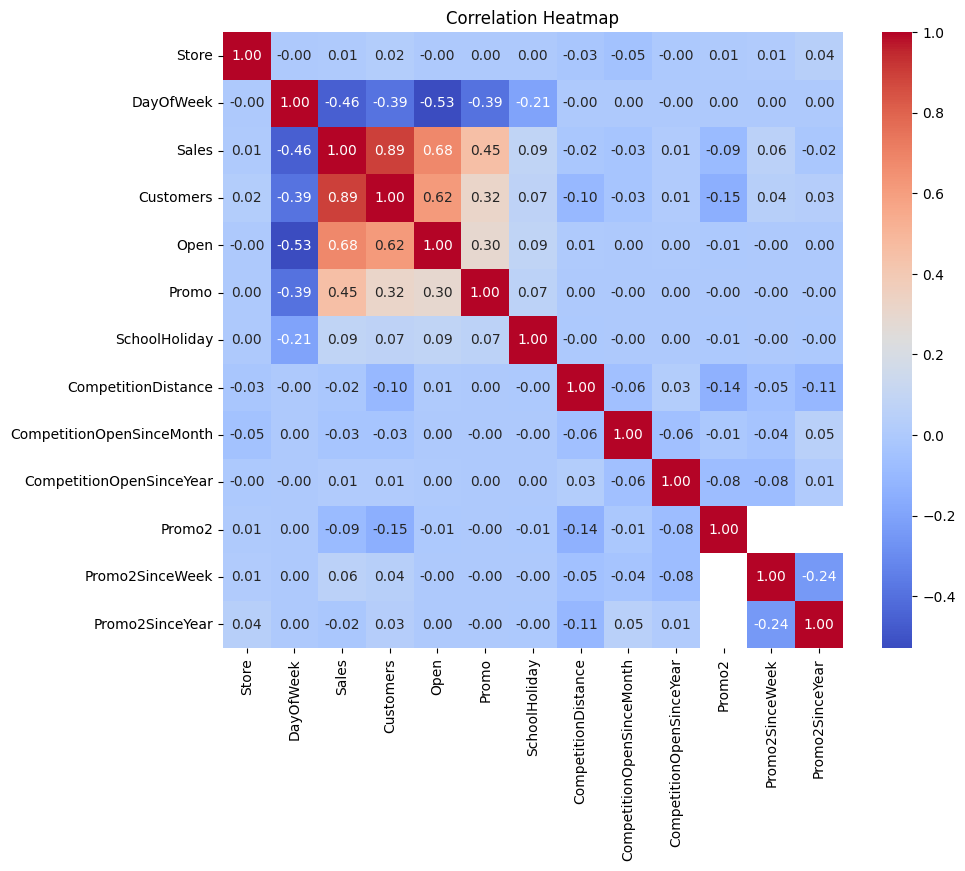

In [ ]:
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## 5.Average Sales by Day of the Week
As we realized in the previous parts the later in the week the less the sales.

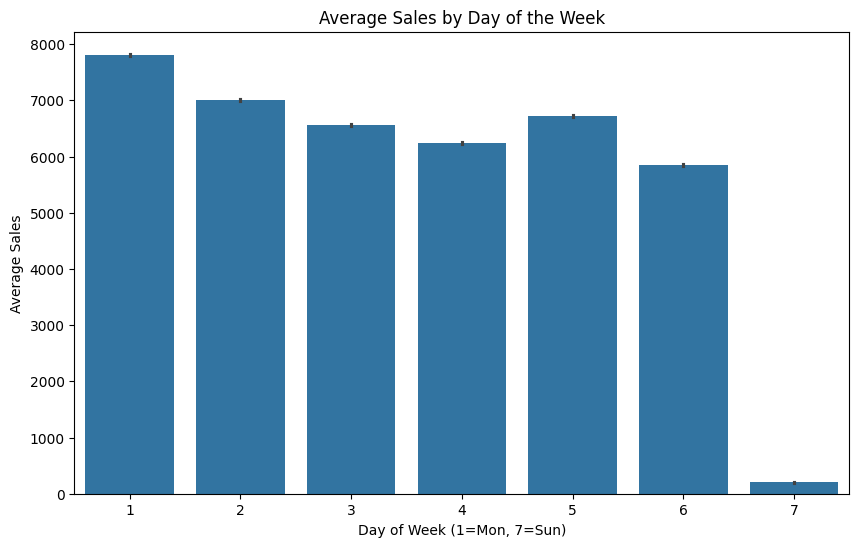

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='DayOfWeek', y='Sales', data=df)
plt.title('Average Sales by Day of the Week')
plt.xlabel('Day of Week (1=Mon, 7=Sun)')
plt.ylabel('Average Sales')
plt.show()

## 6.Monthly Sales Seasonality

- January markes the lowest sales mainly because of christmas and new year hollidays.
- The highest sales is in December.
- In [1,3] ,[5,7] ,[10,12] we see a ascending trend.
- In [3.5], [5,10], we see a descending trend.

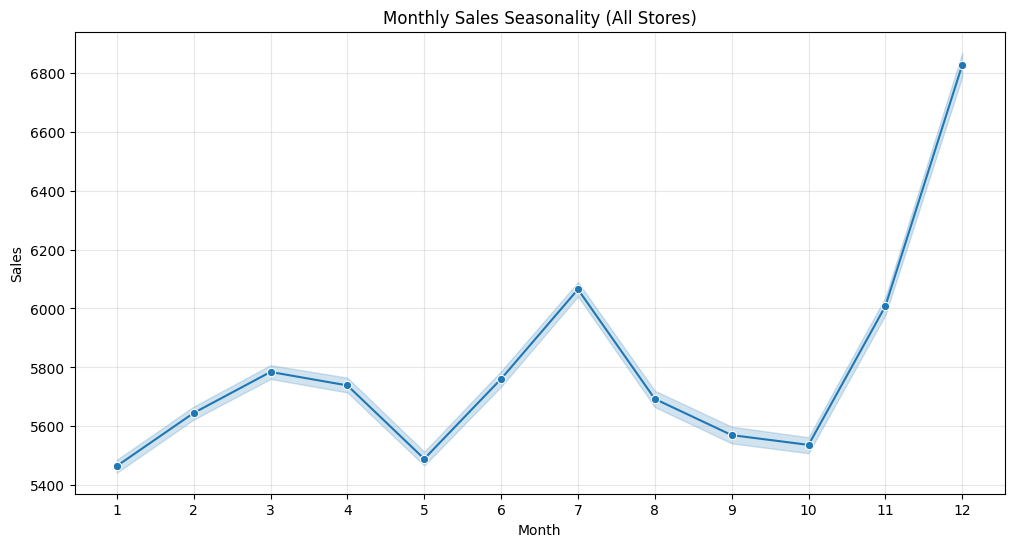

In [ ]:
# Extract Month 
df['Month'] = df['Date'].dt.month

plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Sales', data=df, marker='o')
plt.title('Monthly Sales Seasonality')
plt.xticks(range(1, 13))
plt.grid(True, alpha=0.3)
plt.show()

Not all stores react to promotions the same way. This grouped bar chart shows how Promo impacts different StoreType categories (a, b, c, d).

## 7.Impact of Promo on Sales across Store Types

- In type `b` stores that have higher sales promos yields less increase in sales compare to the rest(In percentage).

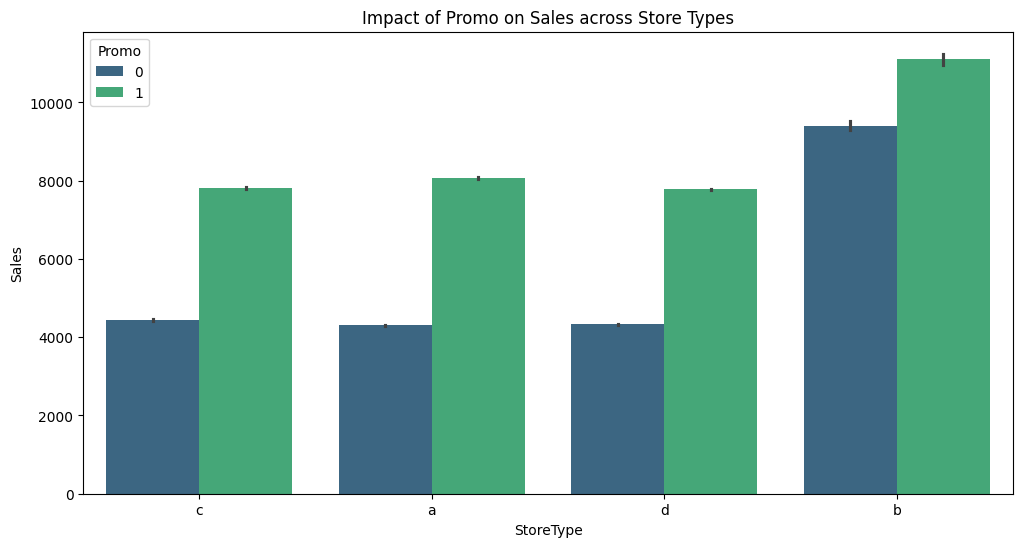

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='StoreType', y='Sales', hue='Promo', data=df, palette='viridis')
plt.title('Impact of Promo on Sales across Store Types')
plt.show()

## 8. Competition Distance vs. Sales

Does having a competitor nearby actually hurt sales? We’ll use a scatter plot with a regression line to see the correlation.



- This suggests that most Rossmann stores operate in highly competitive environments.

-  We do not see a sharp decline in sales for stores with very close competitors. In fact, some of the highest-selling days occur when a competitor is within 1,000 meters.



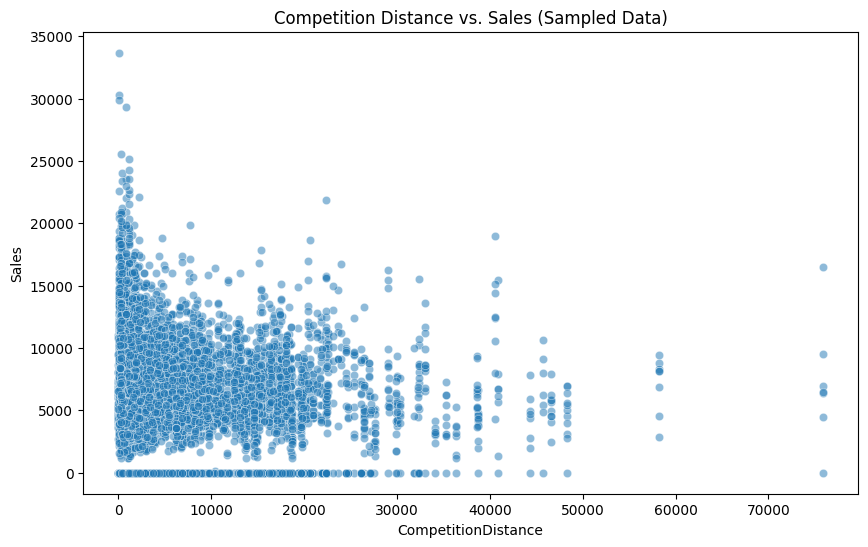

In [3]:
sample_df = df.dropna(subset=['CompetitionDistance']).sample(10000)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='CompetitionDistance', y='Sales', data=sample_df, alpha=0.5)
plt.title('Competition Distance vs. Sales (Sampled Data)')
plt.show()

## 9.Sale distribution
Here we can see the sales distribution that has a mean of approximatly 5000.

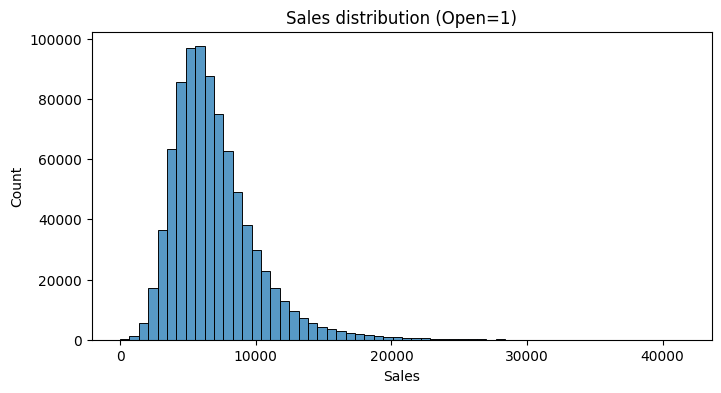

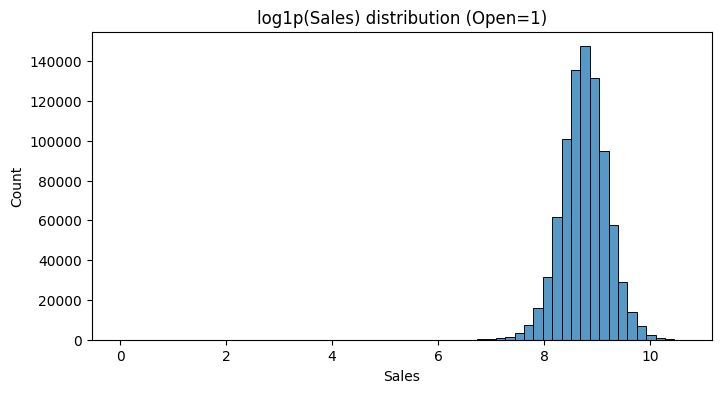

In [4]:
tmp = df[df["Open"]==1].copy()
plt.figure(figsize=(8,4))
sns.histplot(tmp["Sales"], bins=60, kde=False)
plt.title("Sales distribution (Open=1)")
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(np.log1p(tmp["Sales"]), bins=60, kde=False)
plt.title("log1p(Sales) distribution (Open=1)")
plt.show()